In [1]:
from pandas import DataFrame,read_csv,concat,notnull
import glob
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
uncert=read_csv('data_pour_python.csv')
macroloss=read_csv('macrocost_all.csv',header=None)
macroloss.columns=["Y"+str(i) for i in range(2010,2051)]
twovar = read_csv('twovar.csv')

In [4]:
def plot_arrow(inix,iniy,finx,finy,thecolor,thescale):
    deltax = thescale*(finx - inix)
    deltay = thescale*(finy - iniy)
    plt.arrow(inix, iniy, deltax, deltay, head_width=0.008, head_length=0.4,color=thecolor)
    #plt.plot([inix,finx],[iniy,finy],color=thecolor,linewidth=2)

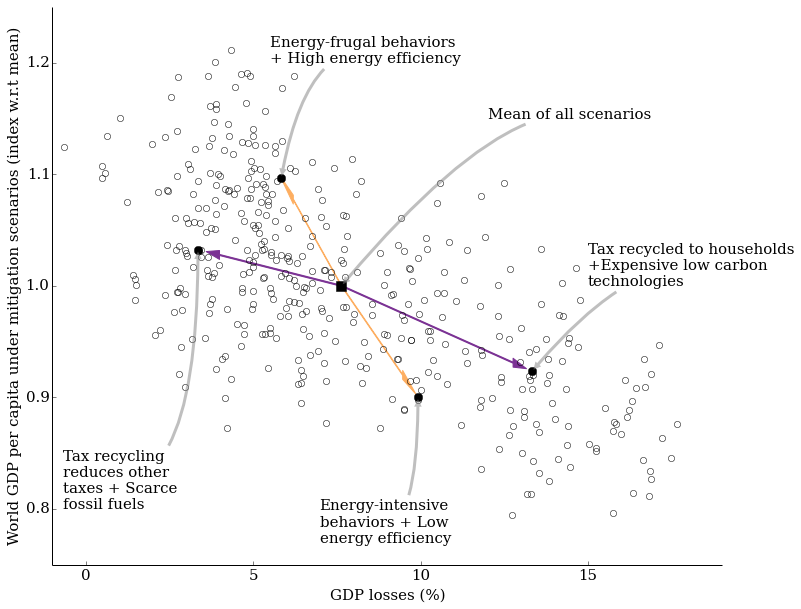

In [5]:
from pylab import *
#from numarray import *

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(12,10))
ax=plt.subplot(111)

cost=twovar.macroCostW_disc_all
pib=twovar.GDPcapW_disc_all

plt.plot(cost,pib,color="black",
         marker='o',linestyle='None',fillstyle='none',markersize=6,clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim([-1,19])
ax.set_ylim([0.75,1.25])
plt.xlabel("GDP losses (%)")
plt.ylabel("World GDP per capita under mitigation scenarios (index w.r.t mean)")

plt.plot(cost.mean(),pib.mean(),color="black",
         marker='s',linestyle='None',markersize=10,clip_on=False)
plt.annotate('Mean of all scenarios', xy=(cost.mean(),pib.mean()),  
             xycoords='data',xytext=(12, 1.15), textcoords='data',size=15,
                    arrowprops=dict(arrowstyle="simple",
                                    fc="grey", ec="none",alpha=0.5,
                                    connectionstyle="angle3,angleA=0,angleB=50"),
                        )

select2 = (uncert.recycling==552)&(uncert.coalandCTL==0)
plt.plot(cost[select2].mean(),pib[select2].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select2].mean(),pib[select2].mean(),"#7b3294",0.85)
plt.annotate('Tax recycling\nreduces other\ntaxes + Scarce\nfossil fuels', xy=(cost[select2].mean(),pib[select2].mean()),  
             xycoords='data',xytext=(-0.7, 0.8), textcoords='data',size=15,
                    arrowprops=dict(arrowstyle="simple",
                                    fc="grey", ec="none",alpha=0.5,
                                    connectionstyle="angle3,angleA=0,angleB=90"),
                        )


select4 = (uncert.recycling==550)&(uncert.technologies==0)
plt.plot(cost[select4].mean(),pib[select4].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select4].mean(),pib[select4].mean(),"#7b3294",0.9)
plt.annotate('Tax recycled to households\n+Expensive low carbon\ntechnologies', xy=(cost[select4].mean(),pib[select4].mean()),  
             xycoords='data',xytext=(15, 1.0), textcoords='data',size=15,
                    arrowprops=dict(arrowstyle="simple",
                                    fc="grey", ec="none",alpha=0.5,
                                    connectionstyle="angle3,angleA=0,angleB=50"),
                        )

select6 = (uncert.EE==0)&(uncert.behaviors==0)
plt.plot(cost[select6].mean(),pib[select6].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select6].mean(),pib[select6].mean(),"#fdae61",0.8)
plt.annotate('Energy-intensive\nbehaviors + Low\nenergy efficiency', xy=(cost[select6].mean(),pib[select6].mean()),  
             xycoords='data',xytext=(7, 0.77), textcoords='data',size=15,
                    arrowprops=dict(arrowstyle="simple",
                                    fc="grey", ec="none",alpha=0.5,
                                    connectionstyle="angle3,angleA=0,angleB=90"),
                        )


select8 = (uncert.EE==2)&(uncert.behaviors==1)
plt.plot(cost[select8].mean(),pib[select8].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select8].mean(),pib[select8].mean(),"#fdae61",0.8)
plt.annotate('Energy-frugal behaviors\n+ High energy efficiency', xy=(cost[select8].mean(),pib[select8].mean()),  
             xycoords='data',xytext=(5.5, 1.2), textcoords='data',size=15,
                    arrowprops=dict(arrowstyle="simple",
                                    fc="grey", ec="none",alpha=0.5,
                                    connectionstyle="angle3,angleA=0,angleB=80"),
                        )

plt.savefig("C:\\Users\\julierozenberg\\Google Drive\\work\\paper costs NCC\\test_fig_fleches2.png",bbox_inches="tight",dpi=300)

In [6]:
def annotate_the_dot(thelabel,xydot,xytextdot,theangle=90):
    plt.annotate(thelabel, xy=xydot,xycoords='data',xytext=xytextdot, textcoords='data',size=15,
                #arrowprops=dict(arrowstyle="simple",fc="grey", ec="none",alpha=0.5,connectionstyle="angle3,angleA=0,angleB={}".format(theangle))
                 )

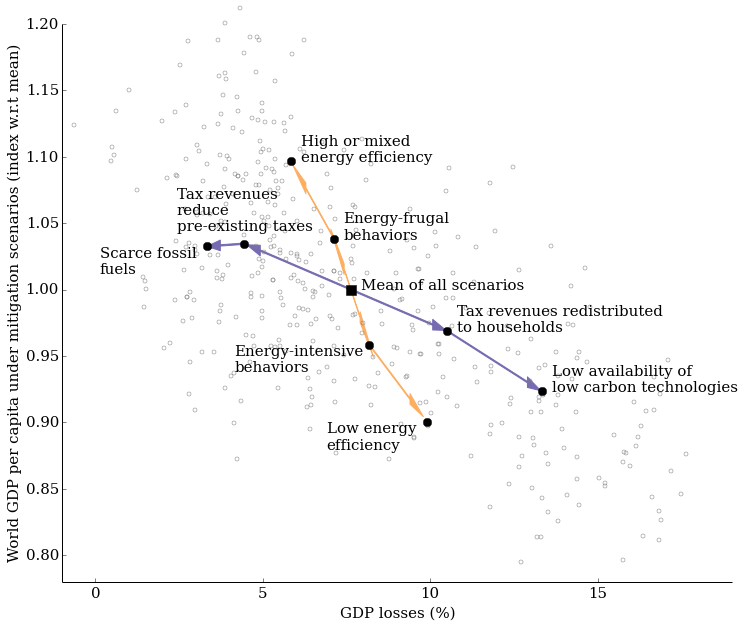

In [10]:
from pylab import *
#from numarray import *

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(12,10))
ax=plt.subplot(111)

cost=twovar.macroCostW_disc_all
pib=twovar.GDPcapW_disc_all

color1="#756bb1"
#color1="#7b3294"

color2="#fdae61"

plt.plot(cost,pib,color="grey",alpha=0.4,
         marker='o',linestyle='None',fillstyle='none',markersize=4,clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim([-1,19])
ax.set_ylim([0.78,1.2])
plt.xlabel("GDP losses (%)")
plt.ylabel("World GDP per capita under mitigation scenarios (index w.r.t mean)")

plt.plot(cost.mean(),pib.mean(),color="black",
         marker='s',linestyle='None',markersize=10,clip_on=False)
annotate_the_dot('Mean of all scenarios',(cost.mean(),pib.mean()),(cost.mean()+0.3,pib.mean()))
#annotate_the_dot('Mean of all scenarios',(cost.mean(),pib.mean(),(12, 1.15),theangle=50)

select1 = uncert.recycling==552
plt.plot(cost[select1].mean(),pib[select1].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select1].mean(),pib[select1].mean(),color1,0.85)
annotate_the_dot('Tax revenues\nreduce\npre-existing taxes',(cost[select1].mean(),pib[select1].mean()),(cost[select1].mean()-2,pib[select1].mean()+0.01))
#annotate_the_dot('Tax recycling\nreduces other\ntaxes',(cost[select1].mean(),pib[select1].mean()),(1, 0.85),theangle=50)

select2 = (uncert.recycling==552)&(uncert.coalandCTL==0)
plt.plot(cost[select2].mean(),pib[select2].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost[select1].mean(),pib[select1].mean(),cost[select2].mean(),pib[select2].mean(),color1,0.65)
annotate_the_dot('Scarce fossil\nfuels',(cost[select2].mean(),pib[select2].mean()),(cost[select2].mean()-3.2,pib[select2].mean()-0.02))
#annotate_the_dot('Scarce fossil\nfuels',(cost[select2].mean(),pib[select2].mean()),(-0.7, 0.9),theangle=90)

select3 = uncert.recycling==550
plt.plot(cost[select3].mean(),pib[select3].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select3].mean(),pib[select3].mean(),color1,0.85)
annotate_the_dot('Tax revenues redistributed\nto households',(cost[select3].mean(),pib[select3].mean()),(cost[select3].mean()+0.3,pib[select3].mean()))
#annotate_the_dot('Tax recycled\n to households',(cost[select3].mean(),pib[select3].mean()),(13, 1.05),theangle=50)

select4 = (uncert.recycling==550)&(uncert.technologies==0)
plt.plot(cost[select4].mean(),pib[select4].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost[select3].mean(),pib[select3].mean(),cost[select4].mean(),pib[select4].mean(),color1,0.85)
annotate_the_dot('Low availability of\nlow carbon technologies',(cost[select4].mean(),pib[select4].mean()),(cost[select4].mean()+0.3,pib[select4].mean()))
#annotate_the_dot('Expensive low\ncarbon technologies',(cost[select4].mean(),pib[select4].mean()),(15, 1.0),theangle=50)

select5 = uncert.behaviors==0
plt.plot(cost[select5].mean(),pib[select5].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select5].mean(),pib[select5].mean(),color2,0.5)
annotate_the_dot('Energy-intensive\nbehaviors',(cost[select5].mean(),pib[select5].mean()),(cost[select5].mean()-4,pib[select5].mean()-0.02))
#annotate_the_dot('Energy-intensive\nbehaviors',(cost[select5].mean(),pib[select5].mean()),(6, 0.8),theangle=80)

select6 = (uncert.EE==0)&(uncert.behaviors==0)
plt.plot(cost[select6].mean(),pib[select6].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost[select5].mean(),pib[select5].mean(),cost[select6].mean(),pib[select6].mean(),color2,0.7)
annotate_the_dot('Low energy\nefficiency',(cost[select6].mean(),pib[select6].mean()),(cost[select6].mean()-3,pib[select6].mean()-0.02))
#annotate_the_dot('Low energy\nefficiency',(cost[select6].mean(),pib[select6].mean()),(10, 0.77),theangle=90)

select7 = uncert.behaviors==1
plt.plot(cost[select7].mean(),pib[select7].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost.mean(),pib.mean(),cost[select7].mean(),pib[select7].mean(),color2,0.4)
annotate_the_dot('Energy-frugal\nbehaviors',(cost[select7].mean(),pib[select7].mean()),(cost[select7].mean()+0.3,pib[select7].mean()),theangle=90)
#annotate_the_dot('Energy-frugal\nbehaviors',(cost[select7].mean(),pib[select7].mean()),(6.5, 1.12),theangle=90)


select8 = (uncert.EE==2)&(uncert.behaviors==1)
plt.plot(cost[select8].mean(),pib[select8].mean(),color="black",
         marker='o',linestyle='None',markersize=8,clip_on=False)
plot_arrow(cost[select7].mean(),pib[select7].mean(),cost[select8].mean(),pib[select8].mean(),color2,0.65)
annotate_the_dot('High or mixed\nenergy efficiency',(cost[select8].mean(),pib[select8].mean()),(cost[select8].mean()+0.3,pib[select8].mean()),theangle=80)
#annotate_the_dot('High energy\nefficiency',(cost[select8].mean(),pib[select8].mean()),(5.5, 1.2),theangle=80)


plt.savefig("C:\\Users\\julierozenberg\\Google Drive\\work\\paper costs NCC\\test_fig_fleches.png",bbox_inches="tight",dpi=300)

In [9]:
np.mean([cost.mean(),cost[select1].mean()])

6.0392504753257876

In [8]:
out=DataFrame()
outpc=DataFrame()

for year in range(2015,2050):
    if (year==2024)|(year==2030)|(year==2049):
        continue
    formula="Y{} ~ recycling+leader_growth+convergence+behaviors+EE+technologies+coalandCTL".format(year)
    selection=macroloss["Y"+str(year)]!=0
    olsmodel=ols(formula,data=concat([macroloss[selection],uncert[selection]],axis=1)).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
    out=out.append(table['sum_sq'],ignore_index=True)
    #outpc=outpc.append(table['sum_sq_pc']*max(macroloss["Y"+str(year)]),ignore_index=True)
    outpc=outpc.append(table['sum_sq_pc'],ignore_index=True)
out.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))
outpc.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))

In [9]:
out.columns

Index(['EE', 'Residual', 'behaviors', 'coalandCTL', 'convergence', 'leader_growth', 'recycling', 'technologies'], dtype='object')

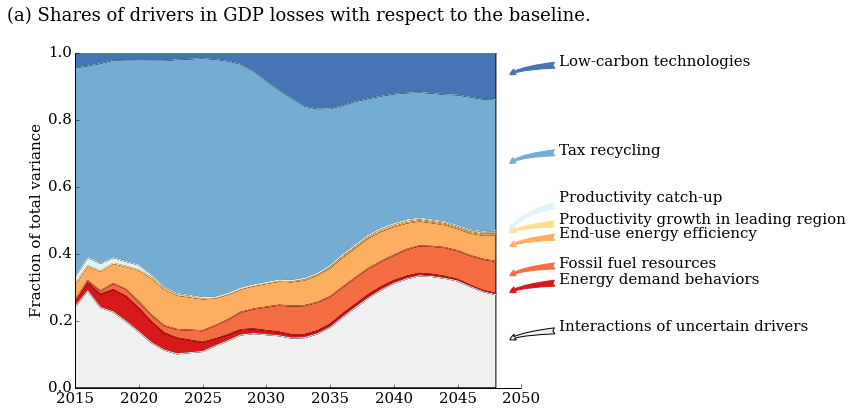

In [10]:
colors=['#F0F0F0','#d7191c','#f46d43','#fdae61','#fee090','#e0f3f8','#74add1','#4575b4']
columns=['Residual', 'behaviors', 'coalandCTL', 'EE',
         'leader_growth', 'convergence', 'recycling', 'technologies']
legends=['Interactions of uncertain drivers','Energy demand behaviors','Fossil fuel resources','End-use energy efficiency',
         'Productivity growth in leading region','Productivity catch-up','Tax recycling','Low-carbon technologies']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

prev=0*out['Residual']
i=0
for thecol in columns:
    plt.plot(outpc.index,prev+outpc[thecol],color=colors[i])
    ax.fill_between(outpc.index, prev, prev+outpc[thecol],facecolor=colors[i],alpha=1)
    ymean=(prev[2048]+prev[2048]+outpc.ix[2048,thecol])/2
    
    if legends[i] in ['Productivity catch-up']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec=colors[i],
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    elif legends[i] in ['Interactions of uncertain drivers']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec='black',
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    else:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=colors[i], ec=colors[i],
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
        
    prev+=outpc[thecol]
    i+=1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_yticklabels([])
ax.set_ylim([0,1])
plt.ylabel("Fraction of total variance")
plt.title("(a) Shares of drivers in GDP losses with respect to the baseline.", y=1.08)
plt.savefig('GDPlosses.png',bbox_inches="tight",dpi=300)



In [11]:
outpc

,EE,Residual,behaviors,coalandCTL,convergence,leader_growth,recycling,technologies
2015,0.048258,0.242301,0.016683,0.002514,0.022038,0.000028,0.624695,0.043483
2016,0.044026,0.289447,0.024003,0.006638,0.025123,0.000590,0.572298,0.037875
2017,0.058986,0.239791,0.039737,0.010062,0.023262,0.000014,0.597600,0.030549
2018,0.060253,0.226824,0.066511,0.018190,0.017500,0.000007,0.589822,0.020893
2019,0.068550,0.198580,0.074865,0.020624,0.014330,0.000697,0.600361,0.021994
2020,0.094368,0.167547,0.070171,0.019571,0.015296,0.000308,0.610333,0.022406
2021,0.110507,0.134632,0.062358,0.020147,0.009111,0.001464,0.639632,0.022148
2022,0.109402,0.112722,0.050817,0.021783,0.006332,0.001264,0.675639,0.022042
2023,0.102320,0.101556,0.047110,0.025640,0.004937,0.001294,0.698150,0.018992
2025,0.095263,0.108398,0.027359,0.034675,0.001644,0.002257,0.714891,0.015514


In [13]:
signal2uncert=np.mean(macroloss)/np.std(macroloss)
signal2uncert.index=list(range(2010,2051))

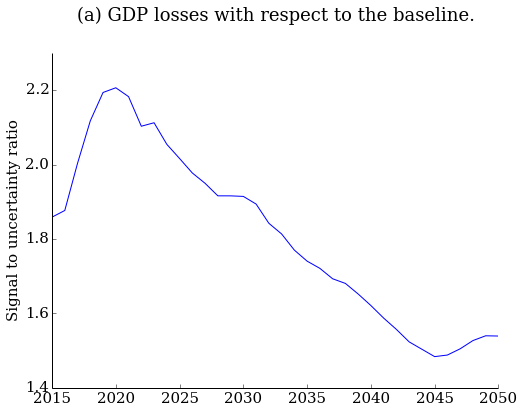

In [14]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

select=signal2uncert.index>2014

plt.plot(signal2uncert[select].index,signal2uncert[select])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.ylabel("Signal to uncertainty ratio")
plt.title("(a) GDP losses with respect to the baseline.", y=1.08)
plt.savefig('GDPlosses_signal.png',bbox_inches="tight",dpi=300)

In [12]:
scenarios=DataFrame.from_csv("matrice_ssp.tsv",sep='\t')
scenarios['combi']=scenarios.index
selection=(scenarios['ind_wages']==1)&(scenarios['ind_climat']!=0)
scenarios['ind_recycling']=scenarios['ind_climat']
scenarios.ix[scenarios['ind_climat']==550,'ind_recycling']=0
scenarios.ix[scenarios['ind_climat']==552,'ind_recycling']=1
scenarios['ind_enereff']=scenarios['ind_EEI']
scenarios.ix[scenarios['ind_EEI']==1,'ind_enereff']=2
scenarios.ix[scenarios['ind_EEI']==2,'ind_enereff']=1
scenarios=scenarios.drop(['ind_EEI'],axis=1)

In [13]:
pib=read_csv('m_PIBpcW.tsv',sep='\t',index_col=False,header=None)
pib.columns=["Y"+str(i) for i in range(2001,2102)]
pib.index=scenarios.index
out2=DataFrame()
outpc2=DataFrame()
for year in range(2015,2050):
    if (year==2024)|(year==2030)|(year==2049):
        continue
    formula="Y{} ~ ind_recycling+ind_productivity_leader+ind_productivity_li+ind_behavior+ind_enereff+ind_techno+ind_coalandCTL".format(year)
    selection2=selection&pib["Y"+str(year)]!=0
    olsmodel=ols(formula,data=concat([pib[selection2],scenarios[selection2]],axis=1)).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
    out2=out2.append(table['sum_sq'],ignore_index=True)
    outpc2=outpc2.append(table['sum_sq_pc'],ignore_index=True)
out2.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))
outpc2.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))



In [14]:
out2.columns

Index(['Residual', 'ind_behavior', 'ind_coalandCTL', 'ind_enereff', 'ind_productivity_leader', 'ind_productivity_li', 'ind_recycling', 'ind_techno'], dtype='object')

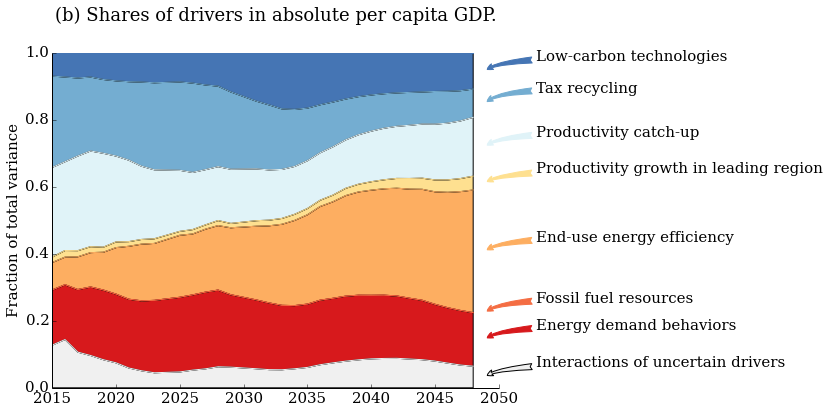

In [15]:
colors=['#F0F0F0','#d7191c','#f46d43','#fdae61','#fee090','#e0f3f8','#74add1','#4575b4']
columns=['Residual', 'ind_behavior', 'ind_coalandCTL', 'ind_enereff', 
         'ind_productivity_leader', 'ind_productivity_li', 'ind_recycling', 'ind_techno']
legends=['Interactions of uncertain drivers','Energy demand behaviors','Fossil fuel resources','End-use energy efficiency',
         'Productivity growth in leading region','Productivity catch-up','Tax recycling','Low-carbon technologies']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

prev=0*outpc2['Residual']
i=0
for thecol in columns:
    plt.plot(outpc2.index,prev+outpc2[thecol],color=colors[i])
    ax.fill_between(outpc2.index, prev, prev+outpc2[thecol],facecolor=colors[i],alpha=1)
    ymean=(prev[2048]+prev[2048]+outpc2.ix[2048,thecol])/2
    
    if legends[i] in ['Productivity catch-up']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec=colors[i],
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    elif legends[i] in ['Interactions of uncertain drivers']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec='black',
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    else:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=colors[i], ec=colors[i],
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
        
    prev+=outpc2[thecol]
    i+=1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_yticklabels([])
ax.set_ylim([0,1])
plt.ylabel("Fraction of total variance")
plt.title("(b) Shares of drivers in absolute per capita GDP.", y=1.08)
plt.savefig('absoluteGDP.png',bbox_inches="tight",dpi=300)



In [16]:
outpc2

,Residual,ind_behavior,ind_coalandCTL,ind_enereff,ind_productivity_leader,ind_productivity_li,ind_recycling,ind_techno
2015,0.127621,0.164715,0.000122,0.081923,0.016411,0.267765,0.272430,0.069013
2016,0.144160,0.163570,0.000349,0.082300,0.019666,0.265176,0.253121,0.071659
2017,0.106548,0.186851,0.000222,0.097711,0.018345,0.282724,0.232951,0.074648
2018,0.096570,0.204436,0.000346,0.102413,0.017850,0.285746,0.220879,0.071761
2019,0.084013,0.207852,0.000208,0.112911,0.015096,0.280472,0.220358,0.079090
2020,0.074627,0.205216,0.000084,0.138870,0.017054,0.256467,0.224548,0.083134
2021,0.059225,0.205341,0.000119,0.158045,0.013949,0.243350,0.234279,0.085692
2022,0.050861,0.208894,0.000048,0.169371,0.013956,0.218791,0.251348,0.086730
2023,0.044941,0.216199,0.000019,0.170088,0.013947,0.206019,0.259882,0.088906
2025,0.047434,0.223021,0.000016,0.185132,0.011722,0.182308,0.263944,0.086423


In [29]:
scenarios2=DataFrame.from_csv("matrice_ssp.tsv",sep='\t')
scenarios2['combi']=scenarios.index
selection_bau=(scenarios['ind_wages']==1)&(scenarios['ind_climat']==0)
scenarios2['ind_enereff']=scenarios2['ind_EEI']
scenarios2.ix[scenarios2['ind_EEI']==1,'ind_enereff']=2
scenarios2.ix[scenarios2['ind_EEI']==2,'ind_enereff']=1
scenarios2=scenarios2.drop(['ind_EEI'],axis=1)

In [30]:
pib=read_csv('m_PIBpcW.tsv',sep='\t',index_col=False,header=None)
pib.columns=["Y"+str(i) for i in range(2001,2102)]
pib.index=scenarios.index
out3=DataFrame()
outpc3=DataFrame()
for year in range(2015,2050):
    if (year==2024)|(year==2030)|(year==2049):
        continue
    formula="Y{} ~ ind_productivity_leader+ind_productivity_li+ind_behavior+ind_enereff+ind_techno+ind_coalandCTL".format(year)
    selection3=selection_bau&pib["Y"+str(year)]!=0
    olsmodel=ols(formula,data=concat([pib[selection3],scenarios2[selection3]],axis=1)).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
    out3=out3.append(table['sum_sq'],ignore_index=True)
    outpc3=outpc3.append(table['sum_sq_pc'],ignore_index=True)
out3.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))
outpc3.index=list(range(2015,2024))+list(range(2025,2030))+list(range(2031,2049))

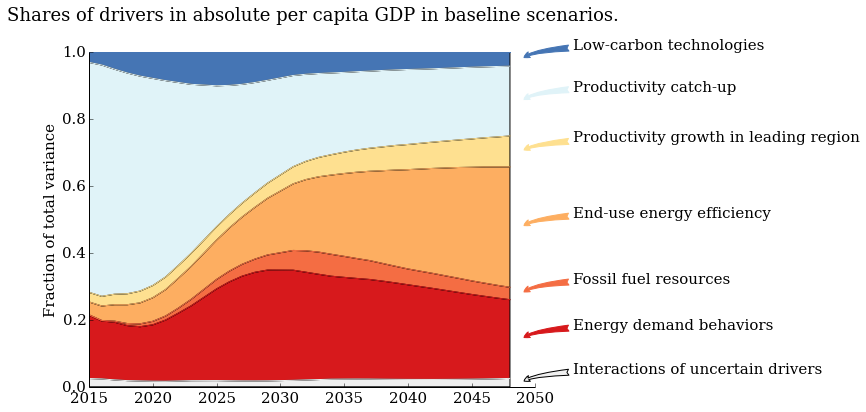

In [34]:
colors=['#F0F0F0','#d7191c','#f46d43','#fdae61','#fee090','#e0f3f8','#4575b4']
columns=['Residual', 'ind_behavior', 'ind_coalandCTL', 'ind_enereff', 
         'ind_productivity_leader', 'ind_productivity_li','ind_techno']
legends=['Interactions of uncertain drivers','Energy demand behaviors','Fossil fuel resources','End-use energy efficiency',
         'Productivity growth in leading region','Productivity catch-up','Low-carbon technologies']

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

prev=0*outpc3['Residual']
i=0
for thecol in columns:
    plt.plot(outpc3.index,prev+outpc3[thecol],color=colors[i])
    ax.fill_between(outpc3.index, prev, prev+outpc3[thecol],facecolor=colors[i],alpha=1)
    ymean=(prev[2048]+prev[2048]+outpc3.ix[2048,thecol])/2
    
    if legends[i] in ['Productivity catch-up']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec=colors[i],
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    elif legends[i] in ['Interactions of uncertain drivers']:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                        xytext=(50, 10), textcoords='offset points',
                        arrowprops=dict(arrowstyle="fancy",
                                        fc=colors[i], ec='black',
                                        patchB=None,
                                        connectionstyle="angle3,angleA=0,angleB=60"),
                            )
    else:
        plt.annotate(legends[i], xy=(2049, ymean),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=colors[i], ec=colors[i],
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
        
    prev+=outpc3[thecol]
    i+=1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_yticklabels([])
ax.set_ylim([0,1])
plt.ylabel("Fraction of total variance")
plt.title("Shares of drivers in absolute per capita GDP in baseline scenarios.", y=1.08)
plt.savefig('absoluteGDPbau.png',bbox_inches="tight",dpi=300)



In [20]:
signal2uncert2=np.mean(pib[selection])/np.std(pib[selection])
signal2uncert2.index=[int(i.replace("Y", "")) for i in signal2uncert2.index]

In [21]:
signal2uncert2=signal2uncert2[signal2uncert2.index<2051]

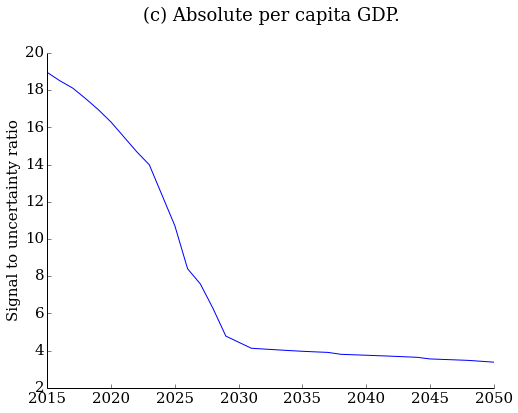

In [22]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

select=signal2uncert2.index>2014

plt.plot(signal2uncert2[select].index,signal2uncert2[select])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.ylabel("Signal to uncertainty ratio")
plt.title("(c) Absolute per capita GDP.", y=1.08)
plt.savefig('GDP_signal.png',bbox_inches="tight",dpi=300)

In [23]:
scenarios.columns

Index(['ind_climat', 'ind_wages', 'ind_productivity_leader', 'ind_productivity_li', 'ind_behavior', 'ind_techno', 'ind_coalandCTL', 'combi', 'ind_recycling', 'ind_enereff'], dtype='object')

In [24]:
def find_baseline(x):
    out=x.ix[select&(x['ind_climat']==0),'combi']
    return out

def find_recycl(x,val):
    out=x.ix[select&(x['ind_climat']!=0)&(x['ind_recycling']==val),'combi']
    return out

In [25]:
pibw=read_csv('m_PIBpcW.tsv',sep='\t',index_col=False,header=None,na_values=[0])
pibw.index=scenarios.index
pibw.columns=["Y"+str(i) for i in range(2001,2102)]
cols=['ind_productivity_leader', 'ind_productivity_li', 'ind_behavior', 'ind_techno', 'ind_coalandCTL', 'ind_enereff']
baselines=scenarios.groupby(cols).apply(lambda x:find_baseline(x))
recycl0=scenarios.groupby(cols).apply(lambda x:find_recycl(x,0))
recycl1=scenarios.groupby(cols).apply(lambda x:find_recycl(x,1))


ValueError: operands could not be broadcast together with shapes (47,) (6,) 

In [ ]:
np.array(pibw.ix[recycl0.values,:].values)

In [ ]:
list_countries=glob.glob('*PIBpc*.tsv')

In [ ]:
for file in list_countries:
    pib=read_csv(file,sep='\t',index_col=False,header=None)
    pib.columns=["Y"+str(i) for i in range(2001,2102)]
    pib.index=scenarios.index
    out=DataFrame()
    outpc=DataFrame()
    for year in range(2010,2050):
        if (year==2024)|(year==2030)|(year==2049):
            continue
        formula="Y{} ~ ind_recycling+ind_productivity_leader+ind_productivity_li+ind_behavior+ind_enereff+ind_techno+ind_coalandCTL".format(year)
        selection2=selection&pib["Y"+str(year)]!=0
        olsmodel=ols(formula,data=concat([pib[selection2],scenarios[selection2]],axis=1)).fit()
        table=anova_lm(olsmodel)
        table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
        out=out.append(table['sum_sq'],ignore_index=True)
        outpc=outpc.append(table['sum_sq_pc'],ignore_index=True)
    out.index=list(range(2010,2024))+list(range(2025,2030))+list(range(2031,2049))
    outpc.index=list(range(2010,2024))+list(range(2025,2030))+list(range(2031,2049))
    f1 = plt.figure()
    plt.title(file, color='black')
    out.plot(kind='area',colormap='gist_rainbow',ax=f1.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    f2 = plt.figure()
    plt.title(file, color='black')
    outpc.plot(kind='area',colormap='gist_rainbow',ax=f2.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    